In [1]:
import mailbox

In [2]:
mboxfile = '/run/media/richie/0B7C15DF0B7C15DF/ubuntu_files/python_lectures_self/new_email_data/Takeout/Mail/All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)

In [3]:
list(mbox[1])

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'Received',
 'DKIM-Filter',
 'DKIM-Signature',
 'Date',
 'From',
 'To',
 'Message-ID',
 'Subject',
 'MIME-Version',
 'Content-Type']

In [4]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
freelancer-domain-signer
DKIM-Signature
List-Unsubscribe
Subject
To
From
Reply-To
MIME-version
Content-language
X-Priority
X-Accept-Language
Content-Type
Date
Message-Id
X-CampaignID
X-GreenArrow-MailClass
Feedback-ID


In [5]:
import csv
with open('mailbox_limited.csv', 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [6]:
import pandas as pd
dfs = pd.read_csv('/run/media/richie/0B7C15DF0B7C15DF/ubuntu_files/python_lectures_self/email_analysis_20_feb_21/mailbox_limited.csv')
dfs.head(3)

,subject,from,date,to,label,thread
0,Freelancer just hit 50 Million Users. Help us ...,Freelancer.com <noreply@updates.freelancer.com>,"Wed, 17 Feb 2021 00:32:48 -0500",rishinigam1304@gmail.com,"Inbox,Category updates,Unread",1691919286199488816
1,Shri TirupatiI Balaji Education Foundation and...,Monster Jobs <jobmessenger@monsterindia.com>,"Thu, 18 Feb 2021 01:59:04 +0000 (GMT)",rishinigam1304@gmail.com,"Inbox,Opened,Category updates",1691996438053592171
2,"Hi Rishi Nigam, Boost Your Career With Top Onl...",Preeti from Naukri Learning <learning.team@nau...,"Fri, 19 Feb 2021 12:14:21 +0530 (IST)",rishinigam1304@gmail.com,"Inbox,Category promotions,Unread",1692104983354268482


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1469 non-null   object
 1   from     1469 non-null   object
 2   date     1469 non-null   object
 3   to       1467 non-null   object
 4   label    1469 non-null   object
 5   thread   1469 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 69.0+ KB


In [8]:
dfs['date'] = dfs['date'].apply(lambda y: pd.to_datetime(y, errors='coerce', utc=True))
dfs['date'].head(5)

0   2021-02-17 05:32:48+00:00
1   2021-02-18 01:59:04+00:00
2   2021-02-19 06:44:21+00:00
3   2021-02-17 00:28:15+00:00
4   2021-02-16 15:12:03+00:00
Name: date, dtype: datetime64[ns, UTC]

In [9]:
len(dfs['date'])

1469

In [10]:
dfs = dfs[dfs['date'].notna()]

In [11]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  1469 non-null   object             
 1   from     1469 non-null   object             
 2   date     1469 non-null   datetime64[ns, UTC]
 3   to       1467 non-null   object             
 4   label    1469 non-null   object             
 5   thread   1469 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 80.3+ KB


In [12]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [13]:
## for from column
import re
import numpy as np

def extract_email(string):
    email = re.findall(r'<(.+?)?>', string)
    if not email:
        email = list(filter(lambda x: '@' in x, string.split()))
    return email[0] if email else np.nan

dfs['from'] = dfs['from'].apply(lambda z: extract_email(z))

In [14]:
dfs.head(2)

,subject,from,date,to,label,thread
0,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,2021-02-17 05:32:48+00:00,rishinigam1304@gmail.com,"Inbox,Category updates,Unread",1691919286199488816
1,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,2021-02-18 01:59:04+00:00,rishinigam1304@gmail.com,"Inbox,Opened,Category updates",1691996438053592171


In [15]:
myemail = 'rishinigam1304@gmail.com'
dfs['label'] = dfs['from'].apply(lambda z: 'sent' if z==myemail else 'inbox')

In [16]:
dfs.head(5)

,subject,from,date,to,label,thread
0,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,2021-02-17 05:32:48+00:00,rishinigam1304@gmail.com,inbox,1691919286199488816
1,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,2021-02-18 01:59:04+00:00,rishinigam1304@gmail.com,inbox,1691996438053592171
2,"Hi Rishi Nigam, Boost Your Career With Top Onl...",learning.team@naukri.com,2021-02-19 06:44:21+00:00,rishinigam1304@gmail.com,inbox,1692104983354268482
3,"Rishi Nigam, New Job Opportunities for Developer",naukrialerts@naukri.com,2021-02-17 00:28:15+00:00,rishinigam1304@gmail.com,inbox,1691900129003336799
4,"Sync Miro with Zapier, MS Teams, Jira, and more",marketing@miro.com,2021-02-16 15:12:03+00:00,rishinigam1304@gmail.com,inbox,1691865133387001307


In [17]:
# dropping to column
dfs.drop(columns='to', inplace=True)

In [18]:
dfs.head(5)

,subject,from,date,label,thread
0,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,2021-02-17 05:32:48+00:00,inbox,1691919286199488816
1,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,2021-02-18 01:59:04+00:00,inbox,1691996438053592171
2,"Hi Rishi Nigam, Boost Your Career With Top Onl...",learning.team@naukri.com,2021-02-19 06:44:21+00:00,inbox,1692104983354268482
3,"Rishi Nigam, New Job Opportunities for Developer",naukrialerts@naukri.com,2021-02-17 00:28:15+00:00,inbox,1691900129003336799
4,"Sync Miro with Zapier, MS Teams, Jira, and more",marketing@miro.com,2021-02-16 15:12:03+00:00,inbox,1691865133387001307


In [19]:
pd.value_counts(dfs.label)

inbox    1393
sent       76
Name: label, dtype: int64

In [20]:
# changing timezone to days and more details
import datetime
import pytz

def refactorizing_time(x):
    s_est = pytz.timezone('Asia/Kuala_Lumpur')
    return x.astimezone(s_est)

dfs['date'] = dfs['date'].apply(lambda z: refactorizing_time(z))

In [21]:
dfs.head(4)

,subject,from,date,label,thread
0,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,2021-02-17 13:32:48+08:00,inbox,1691919286199488816
1,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,2021-02-18 09:59:04+08:00,inbox,1691996438053592171
2,"Hi Rishi Nigam, Boost Your Career With Top Onl...",learning.team@naukri.com,2021-02-19 14:44:21+08:00,inbox,1692104983354268482
3,"Rishi Nigam, New Job Opportunities for Developer",naukrialerts@naukri.com,2021-02-17 08:28:15+08:00,inbox,1691900129003336799


In [22]:
dfs['dayOfWeek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayOfWeek'] = pd.Categorical(dfs['dayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [23]:
dfs.head(5)

,subject,from,date,label,thread,dayOfWeek
0,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,2021-02-17 13:32:48+08:00,inbox,1691919286199488816,Wednesday
1,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,2021-02-18 09:59:04+08:00,inbox,1691996438053592171,Thursday
2,"Hi Rishi Nigam, Boost Your Career With Top Onl...",learning.team@naukri.com,2021-02-19 14:44:21+08:00,inbox,1692104983354268482,Friday
3,"Rishi Nigam, New Job Opportunities for Developer",naukrialerts@naukri.com,2021-02-17 08:28:15+08:00,inbox,1691900129003336799,Wednesday
4,"Sync Miro with Zapier, MS Teams, Jira, and more",marketing@miro.com,2021-02-16 23:12:03+08:00,inbox,1691865133387001307,Tuesday


In [24]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [25]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [26]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [27]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [28]:
dfs.index = dfs['date']
del dfs['date']

In [29]:
dfs.head(5)

,subject,from,label,thread,dayOfWeek,timeofday,hour,year_int,year
date,,,,,,,,,
2021-02-17 13:32:48+08:00,Freelancer just hit 50 Million Users. Help us ...,noreply@updates.freelancer.com,inbox,1691919286199488816,Wednesday,13.546667,13,2021,2021.131417
2021-02-18 09:59:04+08:00,Shri TirupatiI Balaji Education Foundation and...,jobmessenger@monsterindia.com,inbox,1691996438053592171,Thursday,9.984444,9,2021,2021.134155
2021-02-19 14:44:21+08:00,"Hi Rishi Nigam, Boost Your Career With Top Onl...",learning.team@naukri.com,inbox,1692104983354268482,Friday,14.739167,14,2021,2021.136893
2021-02-17 08:28:15+08:00,"Rishi Nigam, New Job Opportunities for Developer",naukrialerts@naukri.com,inbox,1691900129003336799,Wednesday,8.470833,8,2021,2021.131417
2021-02-16 23:12:03+08:00,"Sync Miro with Zapier, MS Teams, Jira, and more",marketing@miro.com,inbox,1691865133387001307,Tuesday,23.200833,23,2021,2021.128679


In [30]:
#"How many emails did I send during a given timeframe?"
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Tue, 13 Oct 2020 11:54 AM
Fri, 19 Feb 2021 02:44 PM
inbox    1393
sent       76
Name: label, dtype: int64


In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    s_est = pytz.timezone('Asia/Kuala_Lumpur')

    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    return ax

In [32]:
#Let's create two sub-dataframe—one for sent emails and another for received emails:

sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

<AxesSubplot:title={'center':'Received'}>

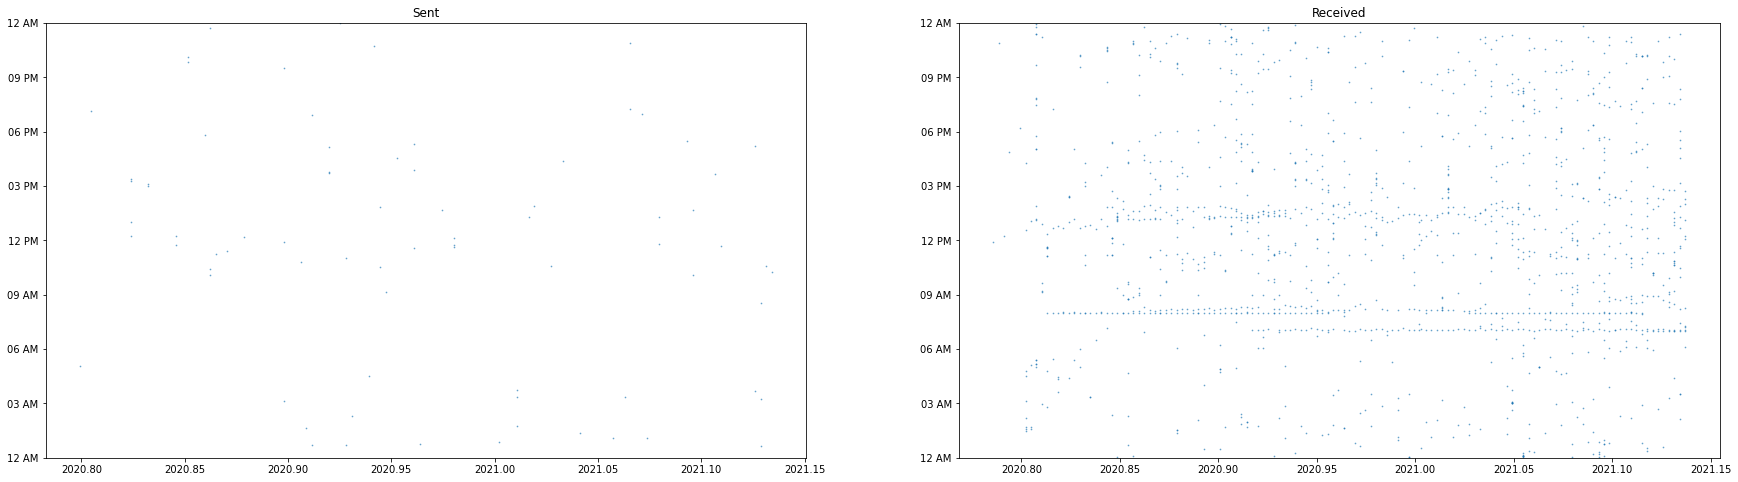

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Since the function is called twice, one with sent and other with recieved as datapoints, 2 plots will be made

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')